In [202]:
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.stats.api as sms

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [203]:
with open('nswre74_control.txt','r') as f:
    c1 = np.array([[float(x) for x in l.strip().split(' ') if len(x)>0] for l in f])
with open('nswre74_treated.txt','r') as f:
    t1 = np.array([[float(x) for x in l.strip().split(' ') if len(x)>0] for l in f])
df = pd.DataFrame(np.vstack((c1,t1)), columns=["treat","age","educ","black","hisp","married","nodegr","re74","re75","re78"])

In [204]:
df.describe()

,treat,age,educ,black,hisp,married,nodegr,re74,re75,re78
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265311,1377.138368,5300.763699
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582400,3150.960771,6631.491695
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388900,1220.836000,8124.715000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.680000,25142.240000,60307.930000


In [205]:
print df.re78[df.treat==1].mean()
print df.re78[df.treat==0].mean()

6349.14353027
4554.801126


In [206]:
print df.re78[df.treat==1].mean()-df.re78[df.treat==0].mean()

1794.34240427


In [207]:
n1 = (df.treat==1).sum()
n0 = (df.treat==0).sum()
sd1 = df.re78[df.treat==1].std()
sd0 = df.re78[df.treat==0].std()
sd = np.sqrt(((n1-1)*sd1**2 + (n0-1)*sd0**2)/(n0+n1-2))
mu1 = df.re78[df.treat==1].mean()
mu0 = df.re78[df.treat==0].mean()
delta = mu1-mu0 
tn = delta/(sd * np.sqrt(1./n0+1./n1))
print 't_n =',tn

t_n = 2.83532082209


In [208]:
print 'p-val for H_0 =',2*(1-scipy.stats.t.cdf(abs(tn),n1+n0-2))

p-val for H_0 = 0.00478752957942


In [209]:
Q = sp.stats.t.ppf(1-.05/2,n1+n0-2)
print '95pct CI for avg diff = [%f,%f]'%(delta - Q*(sd * np.sqrt(1./n0+1./n1)),delta + Q*(sd * np.sqrt(1./n0+1./n1)))


95pct CI for avg diff = [550.574486,3038.110323]


In [210]:
# T test (assume equal variance)
cm = sms.CompareMeans(
    sms.DescrStatsW(df.re78[df.treat==1]),
    sms.DescrStatsW(df.re78[df.treat==0])
)
cm.tconfint_diff()

(550.57448597554094, 3038.1103225649972)

In [211]:
print sd0, sd1

5483.83599137 7867.40221773


In [215]:
# Welch's T test
cm.tconfint_diff(usevar='unequal',alpha=0.01)

(55.165462786120997, 3533.5193457544174)

(array([ 145.,   59.,   31.,   13.,    8.,    3.,    0.,    0.,    0.,    1.]),
 array([     0.   ,   3948.353,   7896.706,  11845.059,  15793.412,
         19741.765,  23690.118,  27638.471,  31586.824,  35535.177,
         39483.53 ]),
 <a list of 10 Patch objects>)

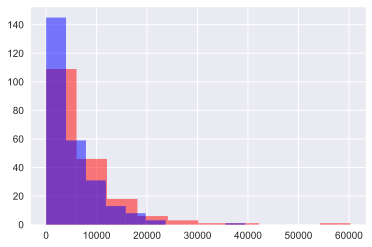

In [216]:
hist(df.re78[df.treat==1],color='r',alpha=0.5)
hist(df.re78[df.treat==0],color='b',alpha=0.5)

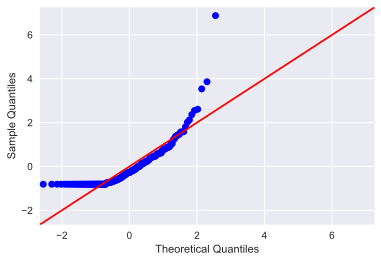

In [220]:
import statsmodels.api as sm

fig = sm.graphics.qqplot(df.re78[df.treat==1], sp.stats.norm, fit=True, line='45')
